# Tugas 1
1. sudah di download ke lokal data dari https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
2. tujuan dari dataset ini adalah untuk memprediksi apakah seseorang akan terkena stroke atau tidak
3. output dari dataset ini adalah kolom "stroke" yang berisi 1 atau 0, dimana 1 berarti orang tersebut terkena stroke dan 0 berarti tidak, input dari dataset ini adalah semua kolom kecuali kolom "stroke" dan "id"

In [1]:
import pandas as pd

df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [3]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


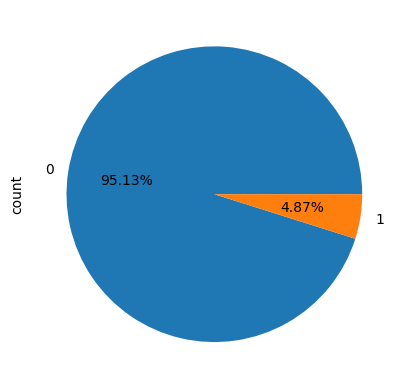

In [5]:
import matplotlib.pyplot as plt

data = df['stroke'].value_counts()
data.plot(kind='pie', autopct='%.2f%%')
plt.show()

dari grafik pie diatas dapat dilihat dataset tidak seimbang, dimana orang yang tidak terkena stroke lebih banyak daripada orang yang terkena stroke

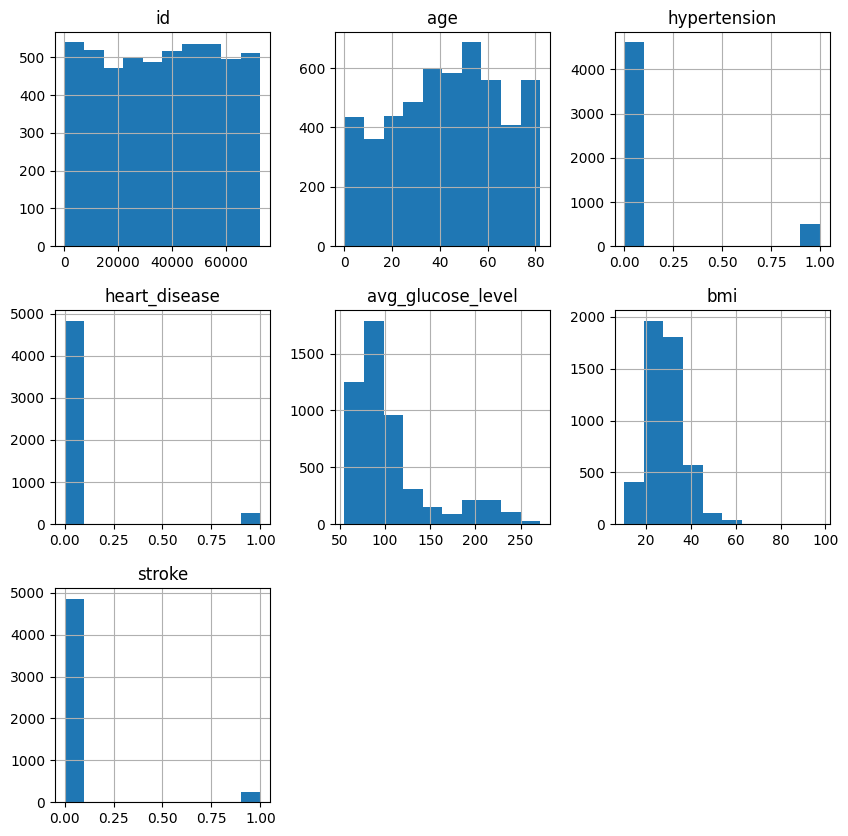

In [6]:
df.hist(figsize=(10, 10))
plt.show()

In [7]:
# check for missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# check categorical attributes
df_X = df.drop(columns=['id', 'stroke'], axis=1)
# definisikan kolom yang jadi input
df_y = df[['stroke']]
# definisikan kolom yang jadi output
cats = df_X.select_dtypes(include=['object', 'bool']).columns
print(cats)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [13]:
df_X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [14]:
# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.metrics import sensitivity_specificity_support

# data preprocessing start
# membuat X dan y, X untuk input variabel dan y untuk target class
# df_X = df_X.drop(columns=['id', 'stroke'])
df_y = df[['stroke']]

# label encoding for y
# merubah nilai yang ada di kolom y menjadi 0 dan 1, sebenernya ini opsional karena udh 0 dan 1
label_encoder = LabelEncoder()
df_y = label_encoder.fit_transform(df_y['stroke'])

# imputation, nilai bmi yang kosong diisi dengan nilai median (boleh juga mean)
df_X['bmi'] = df_X['bmi'].fillna(df_X['bmi'].median(), inplace=True)

# categorical encoding
# merubah nilai yang ada di kolom X yang bersifat kategorikal menjadi angka
# bisa pakai one hot encoding atau label encoding
cats = df_X.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
label_encoder = LabelEncoder()
for cat in cat_features:
    df_X[cat] = label_encoder.fit_transform(df_X[cat])
    
# menyimpan X dan y menjadi ndarray
X = df_X.astype('float').values
y = df_y.astype('float')

# hold out method, split data menjadi data training dan data testing, 70% data training dan 30% data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# standardization, standardisasi nilai X dengan scaling
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# data preprocessing end

/tmp/ipykernel_8504/1315332795.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_X['bmi'] = df_X['bmi'].fillna(df_X['bmi'].median(), inplace=True)


In [15]:
X

array([[  1.  ,  67.  ,   0.  , ..., 228.69,   0.  ,   1.  ],
       [  0.  ,  61.  ,   0.  , ..., 202.21,   0.  ,   2.  ],
       [  1.  ,  80.  ,   0.  , ..., 105.92,   0.  ,   2.  ],
       ...,
       [  0.  ,  35.  ,   0.  , ...,  82.99,   0.  ,   2.  ],
       [  1.  ,  51.  ,   0.  , ..., 166.29,   0.  ,   1.  ],
       [  0.  ,  44.  ,   0.  , ...,  85.28,   0.  ,   0.  ]])

In [16]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [17]:
X_train

array([[ 1.18418048, -1.7467638 , -0.31719928, ..., -0.340693  ,
         0.        , -1.29622579],
       [ 1.18418048, -0.63635252, -0.31719928, ...,  2.26654137,
         0.        ,  1.52066342],
       [ 1.18418048,  0.02989425,  3.15259225, ..., -0.32155489,
         0.        ,  0.58170035],
       ...,
       [-0.84446587, -1.87290652, -0.31719928, ..., -0.18803315,
         0.        , -1.29622579],
       [ 1.18418048,  1.62888649, -0.31719928, ...,  2.01062472,
         0.        , -0.35726272],
       [-0.84446587,  0.11872715, -0.31719928, ..., -0.12416526,
         0.        ,  1.52066342]])

In [18]:
X_test

array([[ 1.18418048, -0.54751962, -0.31719928, ..., -0.90971812,
         0.        , -1.29622579],
       [ 1.18418048, -0.14777156, -0.31719928, ..., -0.89992653,
         0.        ,  0.58170035],
       [-0.84446587, -1.569098  , -0.31719928, ..., -0.69675096,
         0.        , -1.29622579],
       ...,
       [ 1.18418048, -0.05893866, -0.31719928, ..., -0.26569829,
         0.        ,  0.58170035],
       [-0.84446587,  0.60730811, -0.31719928, ..., -0.80846414,
         0.        , -1.29622579],
       [-0.84446587,  0.74055746, -0.31719928, ..., -0.72746095,
         0.        ,  0.58170035]])

Accuracy 0.9419439008480104
Precision 0.4709719504240052
Recall 0.5
Confussion Matrix [[1444    0]
 [  89    0]]


/home/aliif/Documents/kuliah/semester6/belajar-pandas/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score 0.485052065838092


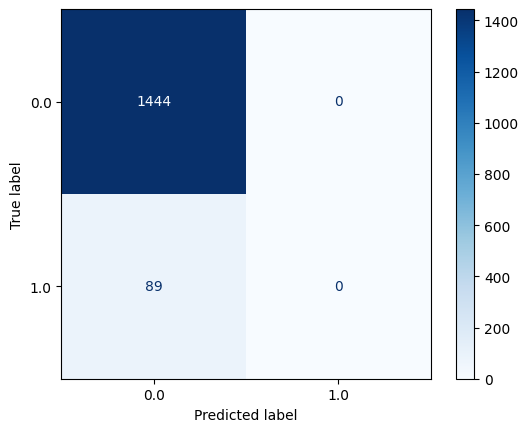

In [19]:
# logistic regression
import numpy as np

model = LogisticRegression()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)
# y_pred jika di print out maka akan keluar vector prediksinya

# menghitung performa model dengan accuracy, precision, recall, dan confusion matrix
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred, average='macro'))
print('Recall', recall_score(y_test, y_pred, average='macro'))
print('Confussion Matrix', confusion_matrix(y_test, y_pred))
# plot confusion matrix(model, X_test, y_test, cmap=plt.cm.Blues)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
# plt.show()
disp.plot(cmap=plt.cm.Blues)

from sklearn.metrics import f1_score
print('F1 Score', f1_score(y_test, y_pred, average='macro'))


In [20]:
# melihat coefisien dari model
model.coef_

array([[-0.01830051,  1.55700859,  0.10160265,  0.07983937, -0.18043546,
        -0.06936689,  0.06055202,  0.19430472,  0.        ,  0.02210363]])

In [21]:
# melihat intercept dari model
model.intercept_

array([-4.05411532])

Accuracy 0.908675799086758
Precision 0.5712131283755713
Recall 0.5666881944660587
Confussion Matrix [[1377   67]
 [  73   16]]


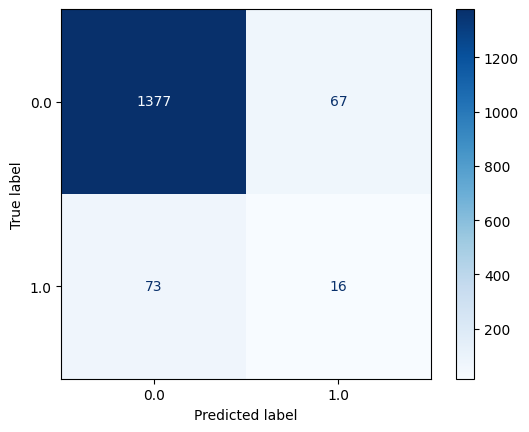

In [22]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

# menghitung performa model dengan accuracy, precision, recall, dan confusion matrix
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred, average='macro'))
print('Recall', recall_score(y_test, y_pred, average='macro'))
print('Confussion Matrix', confusion_matrix(y_test, y_pred))
# plot confusion matrix(model, X_test, y_test, cmap=plt.cm.Blues)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
# plt.show()
disp.plot(cmap=plt.cm.Blues)

Accuracy 0.9412915851272016
Precision 0.6379084967320261
Recall 0.5049254567524666
Confussion Matrix [[1442    2]
 [  88    1]]


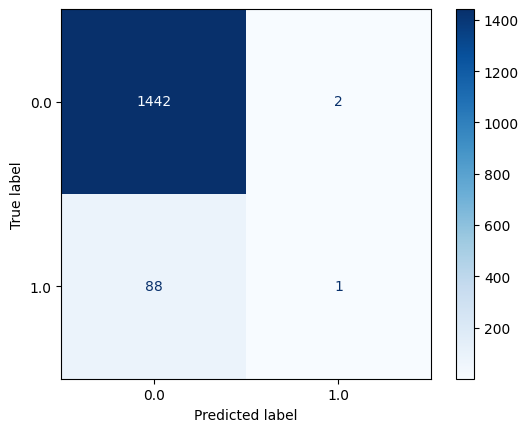

In [23]:
# random forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

# menghitung performa model dengan accuracy, precision, recall, dan confusion matrix
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred, average='macro'))
print('Recall', recall_score(y_test, y_pred, average='macro'))
print('Confussion Matrix', confusion_matrix(y_test, y_pred))
# plot confusion matrix(model, X_test, y_test, cmap=plt.cm.Blues)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
# plt.show()
disp.plot(cmap=plt.cm.Blues)    

/home/aliif/Documents/kuliah/semester6/belajar-pandas/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy 0.9412915851272016
Precision 0.47095300261096606
Recall 0.49965373961218834
Confussion Matrix [[1443    1]
 [  89    0]]


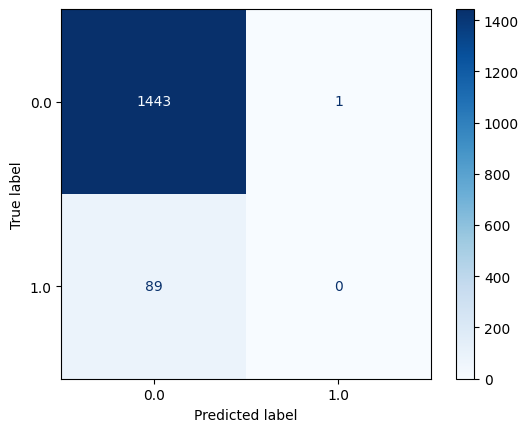

In [25]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

# menghitung performa model dengan accuracy, precision, recall, dan confusion matrix
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred, average='macro'))
print('Recall', recall_score(y_test, y_pred, average='macro'))
print('Confussion Matrix', confusion_matrix(y_test, y_pred))
# plot confusion matrix(model, X_test, y_test, cmap=plt.cm.Blues)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
# plt.show()
disp.plot(cmap=plt.cm.Blues)